In [1]:
import cv2
from matplotlib import pyplot as plt
import easyocr
from src.util import TEMP_DIR, real_esrgan

reader = easyocr.Reader(['en'])

Open cropped image of license plate

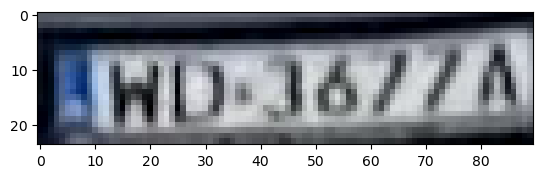

In [12]:
input_image_path = f'{TEMP_DIR}/2023-12-13/id_1_20231213-212113_plate.png'
plate = cv2.imread(input_image_path)
plate = cv2.cvtColor(plate, cv2.COLOR_BGR2RGB) 
plt.imshow(plate)

Reconstruct the clear image of the license plate

In [13]:
hd_plate_path = real_esrgan(input_image_path)

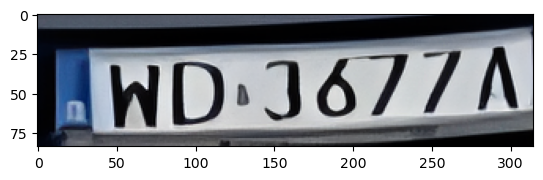

In [14]:
hd_plate = cv2.imread(hd_plate_path)
hd_plate = cv2.cvtColor(hd_plate, cv2.COLOR_BGR2RGB) 
plt.imshow(hd_plate)

Image preprocessing

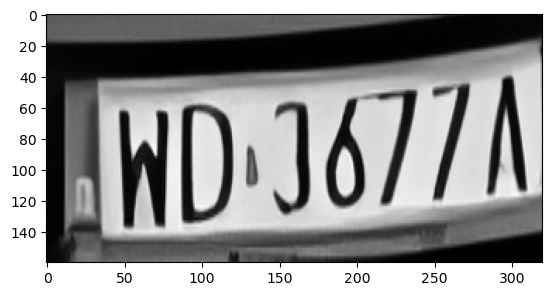

In [19]:
img_lp = cv2.resize(hd_plate, (320,160))
img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
_, img_binary_lp = cv2.threshold(img_gray_lp, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_lp, cmap='gray')

Read the license plate with EasyOCR

In [20]:
reader.readtext(img_gray_lp)

[([[30, 30], [320, 30], [320, 152], [30, 152]],
  'WD J677A',
  0.42092502784401614)]